hyp test sandbox

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import hypothesis_tests as ht

In [2]:
df = pd.read_csv('./data/dirty_data.csv')

In [3]:
len(df)

50000

In [43]:
df.head()

,Unnamed: 0,charge,color,commercial_license,commercial_vehicle,driver_city,hazmat,make,model,vehicle_type,violation_type,year
0,0,21-801.1,BLACK,No,No,FAIRFAX,No,HONDA,CIVIC,02 - Automobile,Warning,2014.0
1,1,21-707(a),BLACK,No,No,SILVER SPRING,No,FORD,TK,02 - Automobile,Warning,2016.0
2,2,11-393.9,WHITE,No,No,ALEXANDRIA,No,HINO,TRUCK,06 - Heavy Duty Truck,Warning,2018.0
3,3,21-309(b),BLACK,No,No,MONTGOMERY VILLAGE,No,HONDA,CIVIC,02 - Automobile,Warning,2008.0
4,4,61,WHITE,No,No,FORT WASHINGTON,No,TOYOTA,COROLA,02 - Automobile,ESERO,2010.0


In [44]:
#df2=df.groupby('commercial_license').count()

In [3]:
df['ticket']=df.violation_type.apply( lambda x : 1 if x == 'Citation' else 0 )

In [9]:
#df['commercial']=df.violation_type.apply( lambda x : 1 if x == 'Citation' else 0 )

In [10]:
def commerce(col1, col2):
    is_comercial=(col1 == 'Yes') | (col2 =='Yes')
    return int(is_comercial)

In [11]:
df['commercial'] = df.apply(lambda x: commerce(x.commercial_license, x.commercial_vehicle), axis=1)

In [12]:
cdl=df.loc[ (df.commercial_license == 'Yes') | (df.commercial_vehicle == 'Yes') ].ticket

In [13]:
ndl=df.loc[(df.commercial_license == 'No') & (df.commercial_vehicle == 'Yes')].ticket

In [51]:
samples=ht.create_sample_dists(df, y_var='ticket', x_var='commercial', categories=[1,0])

In [14]:
stats.ttest_ind(sample2[0], sample2[1])

Ttest_indResult(statistic=6.00180194095527, pvalue=3.295466334408362e-08)

In [20]:

sample2=ht.create_sample_dists(df, y_var='ticket', x_var='color', categories=['BLACK','WHITE','RED'])

In [21]:
F, p = stats.f_oneway(sample2[2], sample2[0], sample2[1])

In [22]:
print(F)

22.42870009851293


In [23]:
print(p)

3.154280407919805e-09


In [16]:
import seaborn as sns

/home/will/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


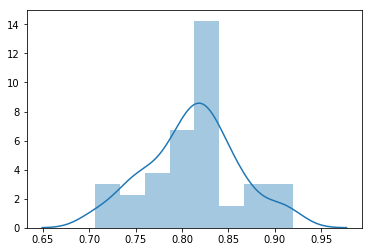

In [25]:
sns.distplot(sample2[0])

In [10]:
print(p)

5.940950159617512e-15


In [13]:
len(sample2[0])

50

In [57]:
sum(sample2[1])/len(sample2[1])

0.7680465717981889

In [36]:
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

In [53]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# mod = ols(f'{sample2[0]} ~ group',
#                 data=data).fit()
                
# aov_table = sm.stats.anova_lm(mod, typ=2)
# print(aov_table)



In [36]:
smparray=np.Array(sample2)

AttributeError: module 'numpy' has no attribute 'Array'

0.8340059187516815

In [64]:
sampler=np.random.choice(sample2[0], size=(60,50))

In [66]:
len(sampler.mean( axis=1))

60

[8097, 5937, 3100]